### CAPSTONE 1 REQUIREMENTS

1. Describe your dataset. Describe and explore your dataset in the initial section of your Report. What does your data contain and what is its background? Where does it come from? Why is it interesting or significant? Conduct summary statistics and produce visualizations for the particular variables from the dataset that you will use.

2. Ask and answer analytic questions. Ask three analytic questions and answer each one with a combination of statistics and visualizations. These analytic questions can focus on individuals behaviors or comparisons of the population.

3. Propose further research. Lastly, make a proposal for a realistic future research project on this dataset that would use some data science techniques you'd like to learn in the bootcamp. Just like your earlier questions, your research proposal should present one or more clear questions. Then you should describe the techniques you would apply in order to arrive at an answer.
*****************************************

# 1. DESCRIPTION OF THE DATASET

This dataset was originally published by "The Ramen Rater", and released on Kaggle. The Ramen Rater is a product review website for the hardcore ramen enthusiast (or "ramenphile"), with over 2500 reviews to date. It contains a review id, brand, variety(the product name), style(cup, bowl, or tray?), country, and stars. Stars indicate the ramen quality assessed by the reviewer on 5 point scale.
I chose this dataset because I am interested in food (especially in Japanese food) and want to see people's preferences in Japanese food.

********************

# 2. ANALYTIC QUESTIONS

 a. Which country produces ramen the most? And which countries make highly rated ramens? (Find top 3 countries)
 
 b. How stars distributed in each top 3 country's ramens?
 
 c. How brand and style affect the ratings?
****************************************************************************************************************************************

## a. Which country produces ramen the most? And which countries make highly rated ramens? (Find top 3 countries)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
ramens = pd.read_csv('ramen-ratings.csv')
ramens.head(5)

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [4]:
ramens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
Review #    2580 non-null int64
Brand       2580 non-null object
Variety     2580 non-null object
Style       2578 non-null object
Country     2580 non-null object
Stars       2580 non-null object
Top Ten     41 non-null object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB


Let's start with checking the number of ramens for each country.

Text(0, 0.5, 'Ramens Count')

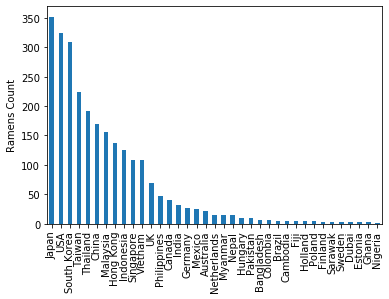

In [5]:
# Integrate data of "United States" & "USA"
ramens["Country"].replace("United States", "USA", inplace=True)
        
ramens.Country.value_counts().plot(kind="bar")
plt.ylabel("Ramens Count")

There are clear reasons for the top 3 countries. Understandably, Japan makes ramens the most because ramen is originally from Japan. Also, the number of USA ramens is the second biggest since this dataset is made in the USA. Regarding South Korea, they have a similar culture like Japan, and they make many ramens because ramen is also popular in South Korea.

__Next, let's see which countries make highly rated ramens?__ I define "highly rated ramen" as "the ramen which has over four stars rating."

Text(0, 0.5, 'Highly Rated Ramens Count')

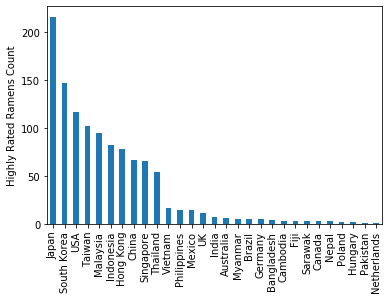

In [6]:
# Find ramens which has over 4 stars
high_rated = ramens[ramens["Stars"] >= "4"]

high_rated.Country.value_counts().plot(kind="bar")
plt.ylabel("Highly Rated Ramens Count")

When we see the top 3 countries, it is natural that Japan has highly rated ramens the most because they produce ramens the most. However, the difference between Japan and other countries got bigger. Also, the ranking of South Korea and the USA is flipped compared to the number of ramens.

Let's see the ratio of highly rated ramens for each country to investigate the reason for the above.

Japan:  61.36363636363637 %
South Korea:  47.57281553398058 %
USA:  36.11111111111111 %


Text(0, 0.5, 'Highly Rated Ratio')

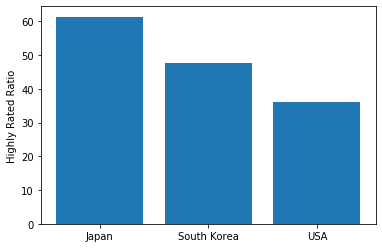

In [7]:
# Find each country's total number of ramens
japanese_ramen = ramens[(ramens["Country"] == "Japan")]
korean_ramen = ramens[ramens["Country"] == "South Korea"]
us_ramen = ramens[ramens["Country"] == "USA"]

# Find each country's number of highly rated ramens
high_rated_japanese_ramen = ramens[(ramens["Country"] == "Japan")& (ramens["Stars"] >= '4')]
high_rated_korean_ramen = ramens[(ramens["Country"] == "South Korea")& (ramens["Stars"] >= '4')]
high_rated_us_ramen = ramens[(ramens["Country"] == "USA")& (ramens["Stars"] >= '4')]

# Check the ratio for highly rated ramens in each country
japanese_high_ratio=len(high_rated_japanese_ramen)/len(japanese_ramen)*100
korean_high_ratio=len(high_rated_korean_ramen)/len(korean_ramen)*100
us_high_ratio=len(high_rated_us_ramen)/len(us_ramen)*100

print("Japan: ", japanese_high_ratio,"%")
print("South Korea: ", korean_high_ratio,"%")
print("USA: ", us_high_ratio,"%")

names = ["Japan", "South Korea", "USA"]
values =[japanese_high_ratio, korean_high_ratio, us_high_ratio]
plt.bar(names, values)
plt.ylabel("Highly Rated Ratio")



Over 60% of Japanese ramens get a high score; on the other hand, only 47 % of Korean ramens, and 36% of the USA ramens get a high score. That is the reason for the change in the previous chart.
************************************

## b. How stars distributed in each top 3 country's ramens?

Next, I will analyze star distribution in each top 3 countries.

/Users/yutakatsuyama/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/yutakatsuyama/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Text(0.5, 1.0, 'Stars Distribution')

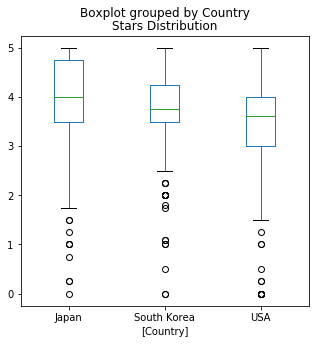

In [8]:
# Find top 3 countries by the number of ramens
top3countries_list = ramens["Country"].value_counts()[:3].index
data_top3countries = ramens[ramens['Country'].isin(top3countries_list)]

# Clean up the data in "Stars" because some ramens are unrated. Then, convert strings to float numbers.
stars=(data_top3countries[ramens['Stars'] != 'Unrated'])
stars["Stars"]=stars["Stars"].astype(float)

stars.boxplot(by=['Country'], column=["Stars"], grid=False, figsize=(5, 5))

plt.title('Stars Distribution')

In [9]:
stars.groupby(['Country'])["Stars"].describe()

,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Japan,352.0,3.981605,0.913755,0.0,3.5,4.000,4.75,5.0
South Korea,307.0,3.790554,0.869436,0.0,3.5,3.750,4.25,5.0
USA,324.0,3.457948,1.054263,0.0,3.0,3.625,4.00,5.0


As we can see, Japanese ramen's mean is nearly 4 stars, and the interquartile range（IQR） is in 3.5 to 4.75. Korean ramen's mean is nearly 3.8, and IQR is in 3.5 to 4.25. USA ramens' mean is 3.4, and IQR is in 3.0 to 4.0.

Also, let's check distribution plot.

Text(0.5, 1.0, 'USA Distribution of Stars')

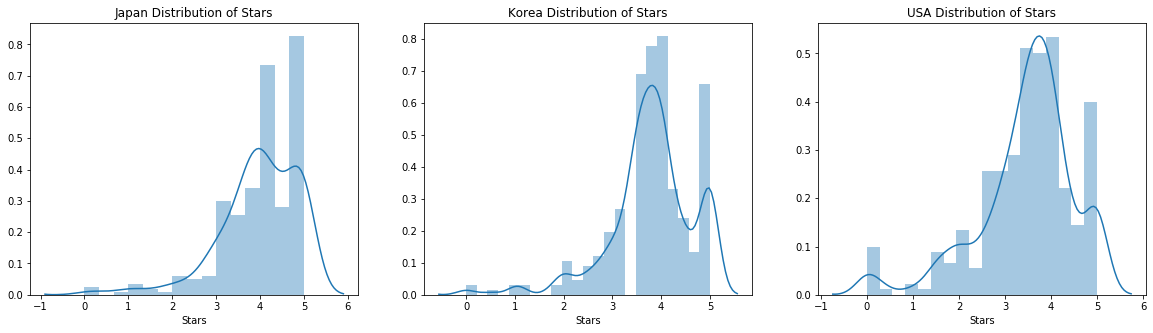

In [10]:
japan_stars=stars[(stars["Country"] == "Japan")]
korea_stars=stars[(stars["Country"]=="South Korea")]
us_stars=stars[(stars["Country"]=="USA")]


f, ax = plt.subplots(1, 3, figsize=(20, 5))

sns.distplot(japan_stars["Stars"], ax=ax[0]).set_title("Japan Distribution of Stars")
sns.distplot(korea_stars["Stars"], ax=ax[1]).set_title("Korea Distribution of Stars")
sns.distplot(us_stars["Stars"], ax=ax[2]).set_title("USA Distribution of Stars")


As we can see, many stars in Japan distribute 4 - 5, and there are only a few lowly rated ramens. Korean stars accumulate in 4 stars, and fewer 5 stars. The USA stars histogram has the most spread shape.  Also, all three country's data shows dipping between 4 and 5 stars.

From these data, we can know that Japanese ramens tend to be of high quality, most of the Korean ramens are stable quality, but fewer excellent tastes compared to Japanese ramens. Also, choosing USA ramens can be a hit or miss. 

Now we know the tendency of ramen's quality based on country of production. Let's see how styles and brand affect the ratings next.
***************************

## c. How brand and style affect the ratings?

First, let's check how brand affects the ratings.

In [11]:
#  Check how many brands the dataset have.
print("Total number of brands:", ramens["Brand"].nunique())

Total number of brands: 355


There are 355 brands in this dataset. This is too many. Let's check only the top 5 brands.

Text(0, 0.5, 'Ramens Count')

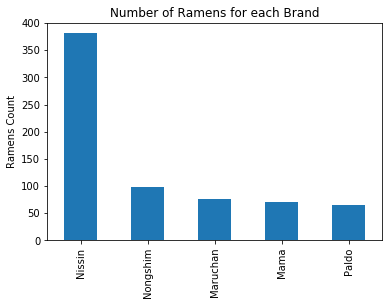

In [12]:
# Filter out minor styles
top5brands_list = ramens["Brand"].value_counts()[:5].index
data_top5brands = ramens[ramens['Brand'].isin(top5brands_list)]

# Before checking the distributions of stars, let's check how many ramens each brand have
data_top5brands.Brand.value_counts().plot(kind="bar").set_title("Number of Ramens for each Brand")
plt.ylabel("Ramens Count")

Nissin is a prominent brand for the number of ramens. Now, let's see the distributions of Stars for the brands.

Also, let me explain which brand is which country's brand before we move on to boxploting.

__Japanese Brand__: Nissin, Maruchan

__Korean Brand__: Nongshim, Paldo

__Thailand Brand__: Mama

/Users/yutakatsuyama/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Text(0.5, 1.0, 'Stars Distribution')

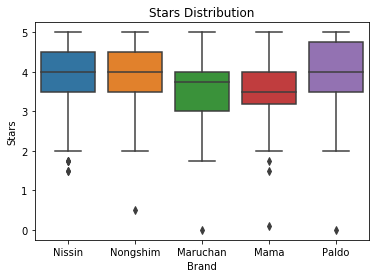

In [13]:
# Clean up the data
top5_brands_stars=(data_top5brands[ramens['Stars'] != 'Unrated'])
top5_brands_stars["Stars"]=top5_brands_stars["Stars"].astype(float)

sns.boxplot(x='Brand', y="Stars", data=top5_brands_stars, order=["Nissin", "Nongshim", "Maruchan", "Mama", "Paldo"])
plt.title('Stars Distribution')

From this chart, we can see that Nissin leads the Japanese ramens high ratings. Also, Korean ramen's stable quality comes from Nongshim and Paldo. (Both are Korean brands.) 


__Japanese Brand__: Nissin, Maruchan

__Korean Brand__: Nongshim, Paldo

__Thailand Brand__: Mama

Lastly, I will check how style affects the ratings.

Text(0, 0.5, 'Ramens Count')

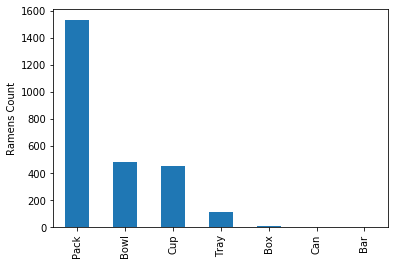

In [14]:
# Check how many ramens for each style. 
        
ramens.Style.value_counts().plot(kind="bar")
plt.ylabel("Ramens Count")

Pack, bowl, and cup are the top 3 styles. Other styles seem to be non-standard.  Therefore, I will check the distribution of the stars only for the top 3 styles.

/Users/yutakatsuyama/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/yutakatsuyama/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Text(0.5, 1.0, 'Distribution of Stars in Styles')

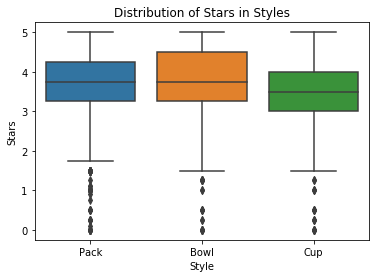

In [15]:
# Filter out minor styles
top3styles_list = ramens["Style"].value_counts()[:3].index
data_top3styles = ramens[ramens['Style'].isin(top3styles_list)]

# Clean up the data
top3_styles_stars=(data_top3styles[ramens['Stars'] != 'Unrated'])
top3_styles_stars["Stars"]=top3_styles_stars["Stars"].astype(float)

sns.boxplot(x='Style', y="Stars", data=top3_styles_stars, order=["Pack", "Bowl", "Cup"]).set_title("Distribution of Stars in Styles")

This is an interesting outcome. I thought cup style is popular than pack style because cup styles are convenient. (When we cook pack style ramen, we need a pot. On the other hand, for the cup styles, we need only boiled water)  However, I understand why this is happening. In my experience, pack style ramens taste better than cup style ramens. From this data, we can assume that this rating places more importance on tastes than convenience.
****************************

# 3. PROPOSAL FOR A FURTHER RESEARCH

One of the reasons why ramens are popular is its various flavors (Shoyu, Miso, Shio, Kimuchi, etc.. ). So, I want to research which flavor is popular.  Also, if it is possible to get data from other countries, I want to see the people's preference on a global scale since this dataset is only from the US.

### __Analytic questions & Techniques I would apply__

__Which flavors are commonly used in the product name?__
-I will make several categories for flavors (Shoyu, Miso, Shio, Kimuchi, etc.. ). Then iterate through the product name, and if the name contains the strings which match the flavors,  append the product name in the flavor's array. (For example, if the product name is "Tasty Tokyo Shoyu Special Noodle, its flavor category is "Shoyu"). Then count the total ramens in each flavor.

__Which flavors are popular based on star ratings?__
-Use the above analytic question's outcome and make a distribution plotting and boxplot.

__How do the ratings change in the US market and Global market?__
-Do the same analysis using ramen rating data from the world. And compare to the current report and see the differences.